In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.preprocessing import StandardScaler
import gc
from pathlib import Path

In [2]:
# Start with input file path
input_file_path = Path('/kaggle/input/mlb-player-digital-engagement-forecasting/')


# Create table with list of CSV files to be read in, w/ corresponding df name
# This does include large 'train' data set (read in separately)
csv_and_df_names = pd.DataFrame(data = {
  'csv_name': ['seasons', 'teams', 'players', 'awards'],
  'df_name': ['seasons', 'teams', 'players', 'awards_pre2018'] 
  })

# Set up for tabbed output
kaggle_data_tabs = widgets.Tab()

# Add Output widgets for each (eventual) DF as tabs' children
kaggle_data_tabs.children = list([widgets.Output() for df_name 
  in csv_and_df_names['df_name']])

for index, row in csv_and_df_names.iterrows():
    
    csv_name = row['csv_name']
    df_name = row['df_name']
    
    # Read from CSV and create df with specified name in environment
    globals()[df_name] = pd.read_csv(input_file_path / f"{csv_name}.csv")

    # Set tab title to df name
    kaggle_data_tabs.set_title(index, df_name)
    
    # Display corresponding table output for this tab name
    with kaggle_data_tabs.children[index]:
        display(eval(df_name))

display(kaggle_data_tabs)

In [3]:
train = pd.read_csv(input_file_path /'train.csv')

# Convert training data date field to pandas datetime type
train['date'] = pd.to_datetime(train['date'], format = "%Y%m%d")

display(train.info())

display(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1216 non-null   datetime64[ns]
 1   nextDayPlayerEngagement  1216 non-null   object        
 2   games                    639 non-null    object        
 3   rosters                  1216 non-null   object        
 4   playerBoxScores          538 non-null    object        
 5   teamBoxScores            538 non-null    object        
 6   transactions             1103 non-null   object        
 7   standings                531 non-null    object        
 8   awards                   294 non-null    object        
 9   events                   536 non-null    object        
 10  playerTwitterFollowers   40 non-null     object        
 11  teamTwitterFollowers     40 non-null     object        
dtypes: datetime64[ns](1), object(11)
m

None

,date,nextDayPlayerEngagement,games,rosters,playerBoxScores,teamBoxScores,transactions,standings,awards,events,playerTwitterFollowers,teamTwitterFollowers
0,2018-01-01,"[{""engagementMetricsDate"":""2018-01-02"",""player...",NaN,"[{""playerId"":400121,""gameDate"":""2018-01-01"",""t...",NaN,NaN,"[{""transactionId"":340732,""playerId"":547348,""pl...",NaN,NaN,NaN,"[{""date"":""2018-01-01"",""playerId"":545361,""playe...","[{""date"":""2018-01-01"",""teamId"":147,""teamName"":..."
1,2018-01-02,"[{""engagementMetricsDate"":""2018-01-03"",""player...",NaN,"[{""playerId"":134181,""gameDate"":""2018-01-02"",""t...",NaN,NaN,"[{""transactionId"":339458,""playerId"":621173,""pl...",NaN,NaN,NaN,NaN,NaN
2,2018-01-03,"[{""engagementMetricsDate"":""2018-01-04"",""player...",NaN,"[{""playerId"":425492,""gameDate"":""2018-01-03"",""t...",NaN,NaN,"[{""transactionId"":347527,""playerId"":572389,""pl...",NaN,NaN,NaN,NaN,NaN
3,2018-01-04,"[{""engagementMetricsDate"":""2018-01-05"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-04"",""t...",NaN,NaN,"[{""transactionId"":339549,""playerId"":545343,""pl...",NaN,NaN,NaN,NaN,NaN
4,2018-01-05,"[{""engagementMetricsDate"":""2018-01-06"",""player...",NaN,"[{""playerId"":282332,""gameDate"":""2018-01-05"",""t...",NaN,NaN,"[{""transactionId"":341195,""playerId"":628336,""pl...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,2021-04-26,"[{""engagementMetricsDate"":""2021-04-27"",""player...","[{""gamePk"":634374,""gameType"":""R"",""season"":2021...","[{""playerId"":405395,""gameDate"":""2021-04-26"",""t...","[{""home"":1,""gamePk"":634377,""gameDate"":""2021-04...","[{""home"":1,""teamId"":139,""gamePk"":634343,""gameD...","[{""transactionId"":480386,""playerId"":543685,""pl...","[{""season"":2021,""gameDate"":""2021-04-26"",""divis...",NaN,"[{""gamePk"":634433,""gameDate"":""2021-04-26"",""gam...",NaN,NaN
1212,2021-04-27,"[{""engagementMetricsDate"":""2021-04-28"",""player...","[{""gamePk"":634318,""gameType"":""R"",""season"":2021...","[{""playerId"":443558,""gameDate"":""2021-04-27"",""t...","[{""home"":1,""gamePk"":634320,""gameDate"":""2021-04...","[{""home"":1,""teamId"":117,""gamePk"":634333,""gameD...","[{""transactionId"":480456,""playerId"":642162,""pl...","[{""season"":2021,""gameDate"":""2021-04-27"",""divis...",NaN,"[{""gamePk"":634332,""gameDate"":""2021-04-27"",""gam...",NaN,NaN
1213,2021-04-28,"[{""engagementMetricsDate"":""2021-04-29"",""player...","[{""gamePk"":634309,""gameType"":""R"",""season"":2021...","[{""playerId"":429722,""gameDate"":""2021-04-28"",""t...","[{""home"":1,""gamePk"":634310,""gameDate"":""2021-04...","[{""home"":0,""teamId"":111,""gamePk"":634310,""gameD...","[{""transactionId"":480728,""playerId"":545358,""pl...","[{""season"":2021,""gameDate"":""2021-04-28"",""divis...",NaN,"[{""gamePk"":634317,""gameDate"":""2021-04-28"",""gam...",NaN,NaN
1214,2021-04-29,"[{""engagementMetricsDate"":""2021-04-30"",""player...","[{""gamePk"":634330,""gameType"":""R"",""season"":2021...","[{""playerId"":405395,""gameDate"":""2021-04-29"",""t...","[{""home"":1,""gamePk"":634330,""gameDate"":""2021-04...","[{""home"":0,""teamId"":119,""gamePk"":634346,""gameD...","[{""transactionId"":480993,""playerId"":606965,""pl...","[{""season"":2021,""gameDate"":""2021-04-29"",""divis...",NaN,"[{""gamePk"":634346,""gameDate"":""2021-04-29"",""gam...",NaN,NaN


In [4]:
# Get names of all "nested" data frames in daily training set
daily_data_nested_df_names = train.drop('date', axis = 1).columns.values.tolist()

for df_name in daily_data_nested_df_names:
    date_nested_table = train[['date', df_name]]

    date_nested_table = (date_nested_table[
      ~pd.isna(date_nested_table[df_name])
      ].
      reset_index(drop = True)
      )
    
    daily_dfs_collection = []
    
    for date_index, date_row in date_nested_table.iterrows():
        daily_df = pd.read_json(date_row[df_name])
        
        daily_df['dailyDataDate'] = date_row['date']
        
        daily_dfs_collection = daily_dfs_collection + [daily_df]

    # Concatenate all daily dfs into single df for each row
    unnested_table = (pd.concat(daily_dfs_collection,
      ignore_index = True).
      # Set and reset index to move 'dailyDataDate' to front of df
      set_index('dailyDataDate').
      reset_index()
      )
    
    # Creates 1 pandas df per unnested df from daily data read in, with same name
    globals()[df_name] = unnested_table    
    
    # Clean up tables and collection of daily data frames for this df
    del(date_nested_table, daily_dfs_collection, unnested_table)

# Set up for tabbed output
daily_data_unnested_tabs = widgets.Tab()

# Add Output widgets for each (eventual) DF as tabs' children
daily_data_unnested_tabs.children = list([widgets.Output() 
  for df_name in daily_data_nested_df_names])

for index in range(0, len(daily_data_nested_df_names)):
    df_name = daily_data_nested_df_names[index]
    
    # Rename tab bar titles to df names
    daily_data_unnested_tabs.set_title(index, df_name)

    # Display corresponding table output for this tab name
    with daily_data_unnested_tabs.children[index]:
        display(eval(df_name))

display(daily_data_unnested_tabs)

In [5]:
del(train)

gc.collect()

284

**Correlation between targets**

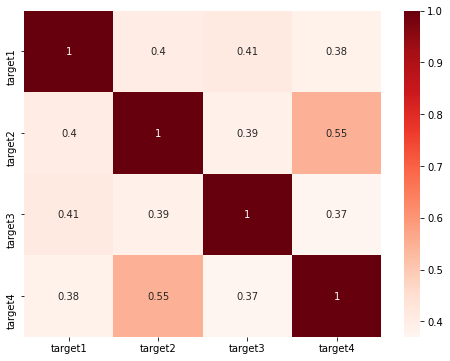

In [6]:
plt.figure(figsize=(8,6))
cor = nextDayPlayerEngagement[['target1','target2','target3','target4']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Relationship between important player-level stats with our target**

*Compute averagre of the four targets*

In [7]:
player_eng_info = nextDayPlayerEngagement.copy()
player_eng_info['target1To4Avg'] = np.mean(
  player_eng_info[['target1', 'target2', 'target3', 'target4']],
  axis = 1)

In [8]:
player_eng_info = player_eng_info[player_eng_info['dailyDataDate'] >='2018-03-29']
player_eng_info = pd.merge(
  player_eng_info,
  playerBoxScores[['dailyDataDate','playerId','gamePk','teamId', 'playerName', 'runsScored', 'atBats', 'homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']],
   on = ['dailyDataDate','playerId'],
   how = 'inner'
   )


In [9]:
player_eng_info.head()

,dailyDataDate,engagementMetricsDate,playerId,target1,target2,target3,target4,target1To4Avg,gamePk,teamId,...,runsScored,atBats,homeRuns,flyOuts,hits,strikes,balks,errors,chances,rbi
0,2018-03-29,2018-03-30,608365,2.040838,7.893376,0.052359,2.599964,3.146634,529407,112,...,1.0,3.0,0.0,0.0,2.0,NaN,NaN,1.0,9.0,0.0
1,2018-03-29,2018-03-30,502624,1.068945,5.105543,2.722191,0.918550,2.453807,529413,158,...,1.0,2.0,0.0,0.0,1.0,61.0,0.0,0.0,0.0,0.0
2,2018-03-29,2018-03-30,643338,0.385945,5.368812,0.074404,0.565661,1.598706,529415,147,...,NaN,NaN,NaN,NaN,NaN,14.0,0.0,0.0,1.0,NaN
3,2018-03-29,2018-03-30,570560,0.131860,6.200931,0.002296,0.181634,1.629180,529408,145,...,1.0,4.0,0.0,0.0,1.0,NaN,NaN,0.0,5.0,3.0
4,2018-03-29,2018-03-30,523260,0.011800,9.933713,6.076820,0.978230,4.250141,529406,111,...,NaN,NaN,NaN,NaN,NaN,13.0,0.0,NaN,NaN,NaN


**Correlation matrix between them**

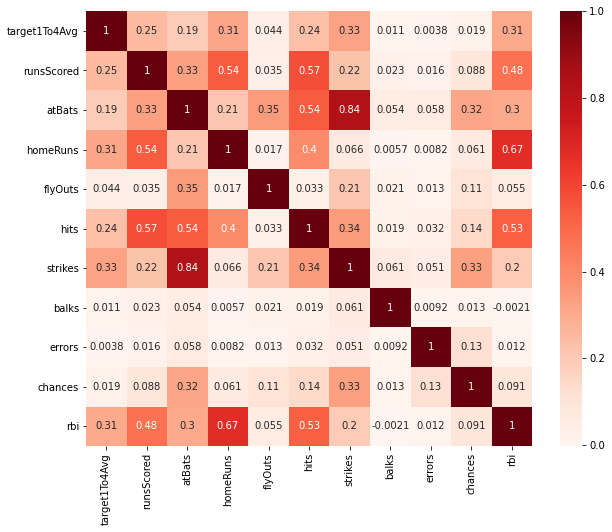

In [10]:
plt.figure(figsize=(10,8))
cor = player_eng_info[['target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

*note : There are some features highly correlated with each other and we may choose only one from them and neglect the other*

In [11]:
standings_stats = pd.merge(
  player_eng_info,
  standings[['dailyDataDate','teamId','wins','losses','pct','xWinLossPct','divisionRank',
             'leagueRank','wildCardRank','lastTenWins','lastTenLosses']],
   on = ['dailyDataDate','teamId'],
   how = 'inner'
   )

**Correlation between important stats from standings data and target**

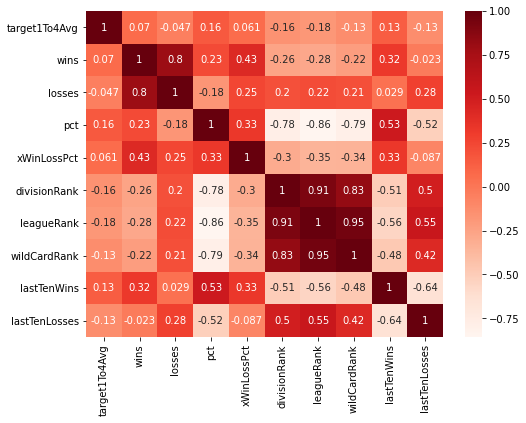

In [12]:
plt.figure(figsize=(8,6))
cor = standings_stats[['target1To4Avg','wins','losses','pct','xWinLossPct','divisionRank',
                       'leagueRank','wildCardRank','lastTenWins','lastTenLosses']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
averaged_data = standings_stats.groupby('dailyDataDate', as_index=True)[['target1To4Avg','runsScored','atBats','homeRuns','flyOuts','hits','strikes',
                   'balks','errors','chances','rbi','pct','xWinLossPct','divisionRank','leagueRank','wildCardRank','lastTenWins','lastTenLosses']].mean()

In [14]:
averaged_data.head()

,target1To4Avg,runsScored,atBats,homeRuns,flyOuts,hits,strikes,balks,errors,chances,rbi,pct,xWinLossPct,divisionRank,leagueRank,wildCardRank,lastTenWins,lastTenLosses
dailyDataDate,,,,,,,,,,,,,,,,,,
2018-03-29,3.157729,0.339286,2.654762,0.098214,0.309524,0.622024,18.805970,0.007463,0.038328,3.407666,0.324405,0.498765,0.148148,3.014815,8.014815,7.769821,0.498765,0.501235
2018-03-30,4.732392,0.288136,2.783051,0.050847,0.474576,0.606780,20.618182,0.000000,0.081081,3.498069,0.274576,0.494135,0.071848,3.190616,8.164223,7.080128,0.897361,0.914956
2018-03-31,3.004417,0.398281,2.742120,0.091691,0.389685,0.693410,21.544715,0.008130,0.051118,3.182109,0.381089,0.500410,0.155597,3.014742,7.958231,7.492063,1.326781,1.319410
2018-04-01,4.292756,0.368421,3.003759,0.105263,0.473684,0.714286,22.432990,0.000000,0.019920,3.390438,0.349624,0.502517,0.137477,3.078550,8.063444,6.778146,1.761329,1.746224
2018-04-02,3.682376,0.312903,2.683871,0.096774,0.354839,0.641935,21.453704,0.009259,0.048148,3.355556,0.306452,0.500866,0.259721,2.911681,7.857550,6.809886,2.165242,2.128205


**Plot Average of targets of all players for each day across time and compare it with average of strikes**

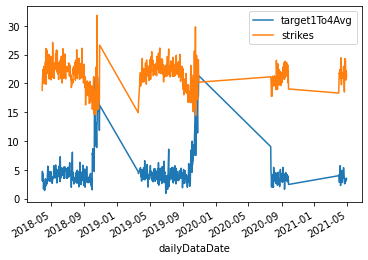

In [15]:
averaged_data[['target1To4Avg','strikes']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

**Plot Average of targets of all players for each day across time and compare it with average of atBats**

In [16]:
averaged_data['atBats'] = averaged_data['atBats']*10

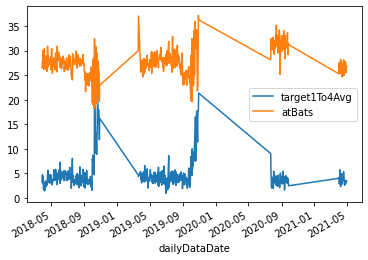

In [17]:
averaged_data[['target1To4Avg','atBats']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

**Plot Average of targets of all players for each day across time and compare it with average of xWinLossPct**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


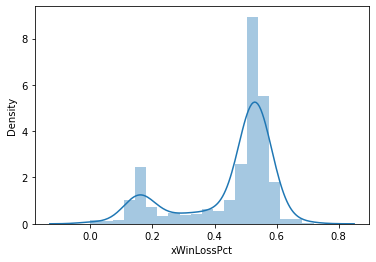

In [18]:
sns.distplot(averaged_data['xWinLossPct'])
plt.show()

In [19]:
averaged_data['xWinLossPct'] = averaged_data['xWinLossPct']*50

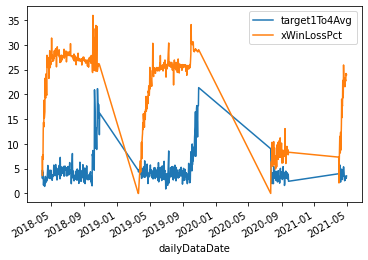

In [20]:
averaged_data[['target1To4Avg','xWinLossPct']].plot()
plt.show()

*note : There is some similarity in their behavior across time*

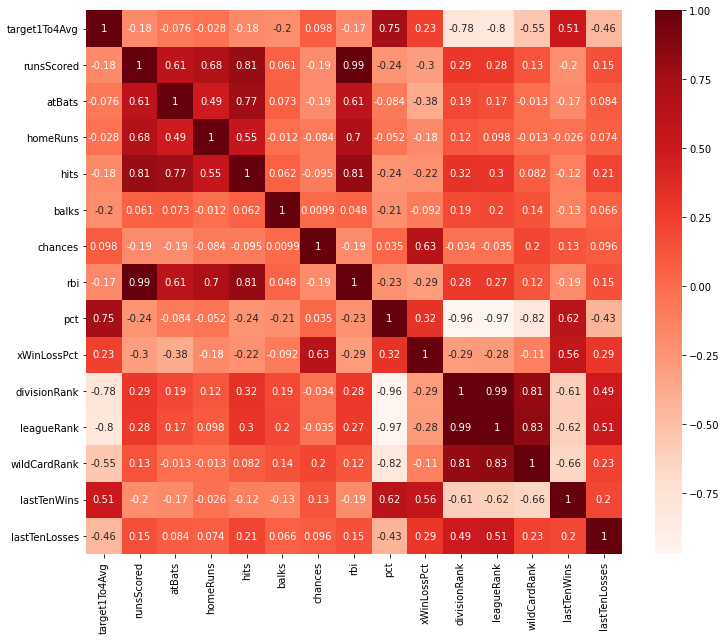

In [21]:
plt.figure(figsize=(12,10))
cor = averaged_data[['target1To4Avg','runsScored','atBats','homeRuns','hits',
        'balks','chances','rbi','pct','xWinLossPct','divisionRank','leagueRank','wildCardRank','lastTenWins','lastTenLosses']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**We see here that 'pct' variable has strong positive correlation with target variable after computing averages of them per every unique day**

**'lastTenWins' variable has strong positive correlation with target and of course 'lastTenLosses' has negative correlation with target also**

**Also 'divisionRank' variable has strong negative correlation with target**

**'leagueRank' variable has strong negative correlation with target**

**'wildCardRank' variable has strong negative correlation with target**


*Before grouping data by unique days and computing averages of variables, the correlation between target and 'pct' was only **0.16** and was **-0.16** with 'divisionRank'*

**We can also see here that 'divisionRank' variable has completely opposite behavior compared to target across time **

In [22]:
averaged_data['divisionRank'] = averaged_data['divisionRank']*10

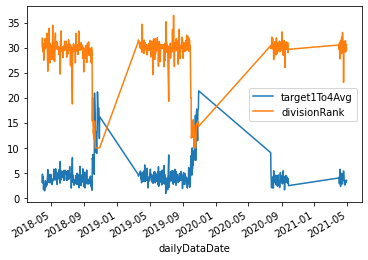

In [23]:
averaged_data[['target1To4Avg','divisionRank']].plot()
plt.show()

**And here we see that 'Current winning percentage' or 'pct' variable has almost the same behavior as target**

In [24]:
averaged_data['pct'] = averaged_data['pct']*50

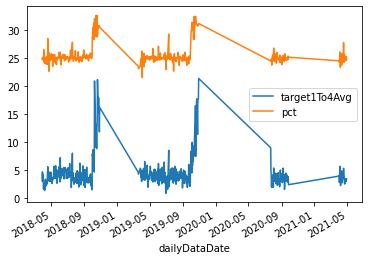

In [25]:
averaged_data[['target1To4Avg','pct']].plot()
plt.show()

In [26]:
final_data = standings_stats.drop(['engagementMetricsDate','target1To4Avg'],axis=1)

final_data = pd.merge(
  final_data,
  awards[['dailyDataDate','awardName','playerId']],
   on = ['dailyDataDate','playerId'],
   how = 'left'
   )

final_data = final_data.fillna(0)

final_data['awardName'] = [1 if x!=0 else 0 for x in final_data['awardName'] ]

final_data = pd.merge(
  final_data,
  playerTwitterFollowers[['dailyDataDate','numberOfFollowers','playerId']],
   on = ['dailyDataDate','playerId'],
   how = 'left'
   )

final_data = pd.merge(
  final_data,
  teamTwitterFollowers[['dailyDataDate','numberOfFollowers','teamId']],
   on = ['dailyDataDate','teamId'],
   how = 'left'
   )

final_data = pd.merge(
  final_data,
  games[['dailyDataDate','gamePk','isTie','gamesInSeries','seriesDescription','homeWinPct','awayWinPct','homeId','awayId']],
   on = ['dailyDataDate','gamePk'],
   how = 'left'
   )

final_data['pct_diff'] = (final_data['homeWinPct'] - final_data['awayWinPct']).abs()

final_data = pd.merge(
  final_data,
  standings[['dailyDataDate','teamId','divisionRank', 'leagueRank','wildCardRank']],
   left_on = ['dailyDataDate','homeId'],
   right_on= ['dailyDataDate','teamId'],
   how = 'left'
   )

final_data = pd.merge(
  final_data,
  standings[['dailyDataDate','teamId','divisionRank', 'leagueRank','wildCardRank']],
   left_on = ['dailyDataDate','awayId'],
   right_on= ['dailyDataDate','teamId'],
   how = 'left'
   )

final_data = final_data.rename(columns={'divisionRank_x': 'player_divisionRank', 'divisionRank_y': 'home_divisionRank', 
                                       'divisionRank' : 'away_divisionRank'})
final_data = final_data.rename(columns={'leagueRank_x': 'player_leagueRank', 'leagueRank_y': 'home_leagueRank', 
                                       'leagueRank' : 'away_leagueRank'})
final_data = final_data.rename(columns={'wildCardRank_x': 'player_wildCardRank', 'wildCardRank_y': 'home_wildCardRank', 
                                       'wildCardRank' : 'away_wildCardRank'})

final_data['divisionRank_diff'] = (final_data['home_divisionRank'] - final_data['away_divisionRank']).abs()
final_data['leagueRank_diff'] = (final_data['home_leagueRank'] - final_data['away_leagueRank']).abs()
final_data['wildCardRank_diff'] = (final_data['home_wildCardRank'] - final_data['away_wildCardRank']).abs()

final_data = final_data.drop(['playerName','homeId', 'awayId'],axis=1)
final_data = final_data.drop(['seriesDescription'],axis=1)
final_data = final_data.drop(['teamId_x','teamId_y', 'teamId'],axis=1)


In [27]:
data = final_data.copy()
data = pd.merge(
  data,
  playerBoxScores[['dailyDataDate','playerId','assists', 'balls', 'baseOnBalls',
       'baseOnBallsPitching', 'battersFaced', 'battingOrder', 'blownSaves',
       'catchersInterference', 'catchersInterferencePitching',
       'caughtStealing', 'caughtStealingPitching',
       'completeGamesPitching', 'doubles', 'doublesPitching', 'earnedRuns','totalBases', 'triples', 'triplesPitching', 'wildPitches',
       'winsPitching']],
   on = ['dailyDataDate','playerId'],
   how = 'left'
   )

In [28]:
data = data.drop(['gamePk'],axis=1)

In [29]:
data = data.fillna(0)
feature_columns = [x for x in data.columns[7:]]
target_columns = [x for x in data.columns[2:6]]
data[feature_columns] = data[feature_columns].astype(np.float32)

data = data.fillna(0)

In [30]:
feature_columns

['atBats',
 'homeRuns',
 'flyOuts',
 'hits',
 'strikes',
 'balks',
 'errors',
 'chances',
 'rbi',
 'wins',
 'losses',
 'pct',
 'xWinLossPct',
 'player_divisionRank',
 'player_leagueRank',
 'player_wildCardRank',
 'lastTenWins',
 'lastTenLosses',
 'awardName',
 'numberOfFollowers_x',
 'numberOfFollowers_y',
 'isTie',
 'gamesInSeries',
 'homeWinPct',
 'awayWinPct',
 'pct_diff',
 'home_divisionRank',
 'home_leagueRank',
 'home_wildCardRank',
 'away_divisionRank',
 'away_leagueRank',
 'away_wildCardRank',
 'divisionRank_diff',
 'leagueRank_diff',
 'wildCardRank_diff',
 'assists',
 'balls',
 'baseOnBalls',
 'baseOnBallsPitching',
 'battersFaced',
 'battingOrder',
 'blownSaves',
 'catchersInterference',
 'catchersInterferencePitching',
 'caughtStealing',
 'caughtStealingPitching',
 'completeGamesPitching',
 'doubles',
 'doublesPitching',
 'earnedRuns',
 'totalBases',
 'triples',
 'triplesPitching',
 'wildPitches',
 'winsPitching']

In [31]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    
remove_outliers(data[feature_columns])

In [32]:
def log_transform(data,feature_columns):
    for x in feature_columns:
        data[x] = np.log10(data[x] + 1)

In [33]:
from sklearn.model_selection import train_test_split            
x_train, x_test, y_train, y_test = train_test_split(data[feature_columns],data[target_columns],test_size=0.2, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train.shape

(149865, 55)

In [36]:
y_train.iloc[:,1]

137091    5.454438
83091     9.208370
120989    1.481862
19735     3.296604
128720    3.491299
            ...   
119879    3.269185
103694    2.663755
131932    1.476894
146867    0.994006
121958    3.158631
Name: target2, Length: 149865, dtype: float64

In [37]:
'''from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train.iloc[:,1])
gb.score(x_train,y_train.iloc[:,1])'''

'from sklearn.ensemble import GradientBoostingRegressor\ngb = GradientBoostingRegressor()\ngb.fit(x_train,y_train.iloc[:,1])\ngb.score(x_train,y_train.iloc[:,1])'

In [38]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.layers import Dense, Conv1D, Flatten
from keras import backend as K

#_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
#_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

model = Sequential()
model.add(Dense(64,input_dim=55, kernel_initializer='he_uniform', activation='relu'))
#odel.add(Conv1D(32,16,activation="relu", input_shape=(59, 1)))
#odel.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation='linear'))

model.compile(loss='mae', optimizer='adam',metrics=['mae'])
#K.set_value(model.optimizer.learning_rate, 0.001)

history = model.fit(x_train, y_train, epochs=20,batch_size=100, verbose=1, validation_data=(x_test,y_test))

Epoch 1/20
1499/1499 [==============================] - 4s 2ms/step - loss: 3.0656 - mae: 3.0656 - val_loss: 2.9624 - val_mae: 2.9624
Epoch 2/20
1499/1499 [==============================] - 3s 2ms/step - loss: 2.9397 - mae: 2.9397 - val_loss: 2.9374 - val_mae: 2.9374
Epoch 3/20
1499/1499 [==============================] - 3s 2ms/step - loss: 2.9409 - mae: 2.9409 - val_loss: 2.9379 - val_mae: 2.9379
Epoch 4/20
1499/1499 [==============================] - 3s 2ms/step - loss: 2.9287 - mae: 2.9287 - val_loss: 2.9233 - val_mae: 2.9233
Epoch 5/20
1499/1499 [==============================] - 3s 2ms/step - loss: 2.9094 - mae: 2.9094 - val_loss: 2.9283 - val_mae: 2.9283
Epoch 6/20
1499/1499 [==============================] - 3s 2ms/step - loss: 2.8809 - mae: 2.8809 - val_loss: 2.9158 - val_mae: 2.9158
Epoch 7/20
1499/1499 [==============================] - 3s 2ms/step - loss: 2.9046 - mae: 2.9046 - val_loss: 2.9143 - val_mae: 2.9143
Epoch 8/20
1499/1499 [==============================] - 3s 2ms

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


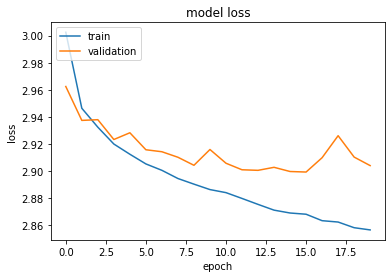

In [39]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [40]:
import mlb

env = mlb.make_env() # initialize the environment
iter_test = env.iter_test() # iterator which loops over each date in test set

#target_columns = ['target1', 'target2', 'target3', 'target4']

for (test_df, sample_prediction_df) in iter_test:
    
    test_df = test_df.reset_index().rename(columns = {'index':'date'})
    sample_prediction_df = sample_prediction_df.reset_index()
    sample_prediction_df = sample_prediction_df.rename(columns={'date':'ddate'})
    sample_prediction_df['date'] = pd.to_datetime(sample_prediction_df['ddate'], format='%Y%m%d')
    sample_prediction_df['playerId'] = sample_prediction_df['date_playerId'].apply(lambda x: x.split('_')[1]).astype(int)

    #games
    
    games_nested_table = test_df[['date','games']]
    games_nested_table = (games_nested_table.reset_index(drop = True))
    games_test = [] 
    for date_index, date_row in games_nested_table.iterrows():
        daily_df = pd.read_json(date_row['games'])   
        daily_df['date'] = date_row['date']
        games_test = games_test + [daily_df] 
        
    games_test = (pd.concat(games_test,
      ignore_index = True).
      reset_index()
      )
    #games_test['date'] = sample_prediction_df['date']
    games_test = games_test[['date','gamePk','isTie','gamesInSeries','seriesDescription',
                             'homeWinPct','awayWinPct','homeId','awayId']]
    
    #players
    
    players_nested_table = test_df[['date','playerBoxScores']]
    players_nested_table = (players_nested_table.reset_index(drop = True))
    players_test = []    
    for date_index, date_row in players_nested_table.iterrows():
        daily_df = pd.read_json(date_row['playerBoxScores'])  
        daily_df['date'] = date_row['date']
        players_test = players_test + [daily_df]   
    players_test = (pd.concat(players_test,
      ignore_index = True).
      reset_index()
      )
    #players_test['date'] = sample_prediction_df['date']
    players_test = players_test[['date','playerId','gamePk','teamId','runsScored', 'atBats', 'homeRuns',
                             'flyOuts','hits','strikes','balks','errors','chances','rbi','assists', 'balls',
       'baseOnBalls', 'baseOnBallsPitching', 'battersFaced', 'battingOrder',
       'blownSaves', 'catchersInterference', 'catchersInterferencePitching',
       'caughtStealing', 'caughtStealingPitching', 'completeGamesPitching',
       'doubles', 'doublesPitching', 'earnedRuns', 'totalBases', 'triples',
       'triplesPitching', 'wildPitches', 'winsPitching']]

    
    #standings
    
    
    standings_nested_table = test_df[['date','standings']]
    standings_nested_table = (standings_nested_table.reset_index(drop = True))
    standings_test = [] 
    for date_index, date_row in standings_nested_table.iterrows():
        daily_df = pd.read_json(date_row['standings']) 
        daily_df['date'] = date_row['date']
        standings_test = standings_test + [daily_df]    
    standings_test = (pd.concat(standings_test,
      ignore_index = True).
      reset_index()
      )
    #standings_test['date'] = sample_prediction_df['date']
    standings_test = standings_test[['date','teamId','wins','losses','pct','xWinLossPct','divisionRank'
             ,'leagueRank','wildCardRank','lastTenWins','lastTenLosses']]
    
    
    players_test['date'] = pd.to_datetime(players_test['date'], format='%Y%m%d')
    final_test4 = pd.merge(
    sample_prediction_df,
    players_test.drop_duplicates(subset=['date','playerId']),
    on = ['playerId','date'],
    how = 'left'
    )


    games_test['date'] = pd.to_datetime(games_test['date'], format='%Y%m%d')
    final_test3 = pd.merge(
    final_test4,
    games_test,
    on = ['date','gamePk'],
    how = 'left'
    )
    
    standings_test['date'] = pd.to_datetime(standings_test['date'], format='%Y%m%d')
    final_test2 = pd.merge(
    final_test3,
    standings_test,
    on = ['date','teamId'],
    how = 'left'
    )
    
    final_test1 = pd.merge(
    final_test2,
    standings_test[['date','teamId','divisionRank', 'leagueRank','wildCardRank']],
    left_on = ['date','homeId'],
    right_on= ['date','teamId'],
    how = 'left'
    )
    
    final_test = pd.merge(
    final_test1,
    standings_test[['date','teamId','divisionRank', 'leagueRank','wildCardRank']],
    left_on = ['date','awayId'],
    right_on= ['date','teamId'],
    how = 'left'
    )
    
    final_test = final_test.rename(columns={'divisionRank_x': 'player_divisionRank', 'divisionRank_y': 'home_divisionRank', 
                                       'divisionRank' : 'away_divisionRank'})
    final_test = final_test.rename(columns={'leagueRank_x': 'player_leagueRank', 'leagueRank_y': 'home_leagueRank', 
                                       'leagueRank' : 'away_leagueRank'})
    final_test = final_test.rename(columns={'wildCardRank_x': 'player_wildCardRank', 'wildCardRank_y': 'home_wildCardRank', 
                                       'wildCardRank' : 'away_wildCardRank'})

    final_test['divisionRank_diff'] = (final_test['home_divisionRank'] - final_test['away_divisionRank']).abs()
    final_test['leagueRank_diff'] = (final_test['home_leagueRank'] - final_test['away_leagueRank']).abs()
    final_test['wildCardRank_diff'] = (final_test['home_wildCardRank'] - final_test['away_wildCardRank']).abs()
    final_test['pct_diff'] = (final_test['homeWinPct'] - final_test['awayWinPct']).abs()
    
    final_test = final_test.drop(['awayId','teamId','homeId','playerId','gamePk'],axis=1)
    final_test['numberOfFollowers_x'] = 0
    final_test['numberOfFollowers_y'] = 0
    final_test['awardName'] = 0
    final_test = final_test.rename(columns={'chances' : 'chances_x'})
    final_test = final_test.fillna(0)  
    
    cols = ['atBats',
 'homeRuns',
 'flyOuts',
 'hits',
 'strikes',
 'balks',
 'errors',
 'chances_x',
 'rbi',
 'wins',
 'losses',
 'pct',
 'xWinLossPct',
 'player_divisionRank',
 'player_leagueRank',
 'player_wildCardRank',
 'lastTenWins',
 'lastTenLosses',
 'awardName',
 'numberOfFollowers_x',
 'numberOfFollowers_y',
 'isTie',
 'gamesInSeries',
 'homeWinPct',
 'awayWinPct',
 'pct_diff',
 'home_divisionRank',
 'home_leagueRank',
 'home_wildCardRank',
 'away_divisionRank',
 'away_leagueRank','away_wildCardRank', 'divisionRank_diff','leagueRank_diff','wildCardRank_diff','assists','balls',
 'baseOnBalls', 'baseOnBallsPitching','battersFaced','battingOrder','blownSaves',
 'catchersInterference','catchersInterferencePitching','caughtStealing','caughtStealingPitching','completeGamesPitching','doubles',
 'doublesPitching','earnedRuns','totalBases','triples', 'triplesPitching','wildPitches','winsPitching']
    
    final_test = final_test[cols]
    
    sc = StandardScaler()
    final_test = sc.fit_transform(final_test)
    
    final_test = final_test.astype(np.float32)
    sample_prediction_df = sample_prediction_df.drop(['playerId'],axis=1)
    sample_prediction_df = sample_prediction_df.set_index('date')
    sample_prediction_df = sample_prediction_df.rename(columns={'ddate':'date'})
    sample_prediction_df = sample_prediction_df[['date','date_playerId','target1', 'target2', 'target3', 'target4']]
    sample_prediction_df = sample_prediction_df.drop(['date'],axis=1)
    sample_prediction_df['target1'] = np.clip(model.predict(final_test)[:,0], 0, 100)
    sample_prediction_df['target2'] = np.clip(model.predict(final_test)[:,1], 0, 100)
    sample_prediction_df['target3'] = np.clip(model.predict(final_test)[:,2], 0, 100)
    sample_prediction_df['target4'] = np.clip(model.predict(final_test)[:,3], 0, 100)
    sample_prediction_df = sample_prediction_df.fillna(0.)
    env.predict(sample_prediction_df)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


In [41]:
'''sample_prediction_df = sample_prediction_df.drop(['date'],axis=1)
sample_prediction_df = sample_prediction_df.rename(columns={'ddate':'date'})
sample_prediction_df = sample_prediction_df[['date','date_playerId','target1', 'target2', 'target3', 'target4']]
sample_prediction_df = sample_prediction_df.drop(['date'],axis=1)'''

"sample_prediction_df = sample_prediction_df.drop(['date'],axis=1)\nsample_prediction_df = sample_prediction_df.rename(columns={'ddate':'date'})\nsample_prediction_df = sample_prediction_df[['date','date_playerId','target1', 'target2', 'target3', 'target4']]\nsample_prediction_df = sample_prediction_df.drop(['date'],axis=1)"

In [42]:
sample_prediction_df.head()

,date_playerId,target1,target2,target3,target4
date,,,,,
2021-04-30,20210501_488726,11.068962,15.308531,3.576935,5.522573
2021-04-30,20210501_605218,0.031920,1.671512,0.000000,0.545914
2021-04-30,20210501_621563,1.013779,2.705888,0.000000,0.664881
2021-04-30,20210501_670084,0.031920,1.671512,0.000000,0.545914
2021-04-30,20210501_670970,0.031920,1.671512,0.000000,0.545914


In [43]:
#sample_prediction_df.to_csv('submission.csv',index=False)